# Homework 5
### PSTAT 131
For this assignment we will be working with the file "pokemon.csv", found in /data. The file is from Kaggle: https://www.kaggle.com/abcsds/pokemon.

The Pokemon franchise encompasses video games, TV shows, movies, books, and a card game. This data set was drawn from the video game series and contains statistics about 721 Pokémon, or “pocket monsters.” In Pokémon games, the user plays as a trainer who collects, trades, and battles Pokémon to (a) collect all the Pokémon and (b) become the champion Pokémon trainer.


Each Pokémon has a primary type (some even have secondary types). Based on their type, a Pokémon is strong against some types, and vulnerable to others. (Think rock, paper, scissors.) A Fire-type Pokémon, for example, is vulnerable to Water-type Pokémon, but strong against Grass-typ

The goal of this assignment is to build a statistical learning model that can predict the primary type of a Pokémon based on its generation, legendary status, and six battle statistics. This is an example of a classification problem, but these models can also be used for regression problems.

Read in the file and familiarize yourself with the variables using pokemon_codebook.tx

**'*' by Exercise means instructions were originally for R-Studio**t.e.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQvTs8O9rWjP0cWAxVHelhq4kBUUxkOTtzreA&s" alt="Titanic" width="70%" style="display: block; margin: auto;" />


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Exercise 1*
Install and load the janitor package. Use its clean_names() function on the data. Why do you think clean_names() is useful? 2

In [124]:
pokemon_data = pd.read_csv("data/pokemon.csv")
#Clean data equivalent to clean_names() function
pokemon_data.columns = pokemon_data.columns.str.lower().str.replace('.', '', regex=False)
pokemon_data.columns = pokemon_data.columns.str.lower().str.replace(' ', '_')
pokemon_data

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


> The clean_names() function is useful because it standardizes the column names, making them easier to reference in code.

## Exercise 2*
Using the entire dataset, create a bar chart of the outcome variable **type_1**. 

How many classes of the outcome are there? Are there any Pokemon types with very few Pokemon? If so, which ones?

For this assignment we'll handle the rarer classes by grouping them, or "lumping them," together into 'other' category. Using the forcats package, determine how to do this, and lump all the other levels except for the top 6 most frequent (which are Bug, Fire, Grass, Normal, Water, and Psychic).

Convert type_1, legendary, and generation to factors.

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: type_1, dtype: int64


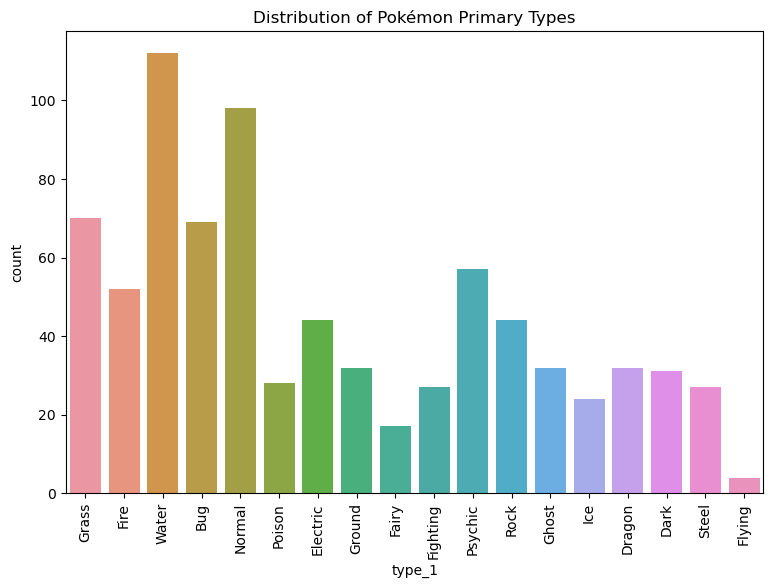

In [108]:
#Plot & check the distribution of the 'type_1' column
plt.figure(figsize=(9,6))
sns.countplot(x='type_1', data=pokemon_data)
plt.xticks(rotation=90), plt.title('Distribution of Pokémon Primary Types')
print(pokemon_data['type_1'].value_counts())

#Lump rare classes into 'Other' category
top_6_types = ['Bug', 'Fire', 'Grass', 'Normal', 'Water', 'Psychic']
pokemon_data['type_1'] = pokemon_data['type_1'].apply(lambda x: x if x in top_6_types else 'Other')

#Convert 'type_1', 'legendary', and 'generation' to factors
pokemon_data['type_1'] = pokemon_data['type_1'].astype('category')
pokemon_data['legendary'] = pokemon_data['legendary'].astype('category')
pokemon_data['generation'] = pokemon_data['generation'].astype('category')

> There are 18 total classes within the outcome. There are a couple types with very few pokemon which include Flying, Fighting, Fairy, and Ice to name a few.

## Exercise 3
Perform an initial split of the data. Stratify by the outcome variable. You can choose the proportion to use. Verify that your training and test sets have the desired number of observations.

Next, use k-fold cross validation on the training set w/ 5 folds. Stratify the folds by the type_1 as well. *Hint: look for the stratify arugment.*

In [112]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [114]:
#Split & Stratify
X = pokemon_data.drop(columns=['type_1'])
y = pokemon_data['type_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 3)

#Cross-validation w/ 5 folds
skf = StratifiedKFold(n_splits=5)

> Stratified sampling ensures each fold has the same proportion of each class, avoiding imbalanced splits.

## Exercise 4
Create a correlation matrix of the training set using the seaborn library. *Note: You can choose how to handle the categorical variables for this plot; justify your decision(s)*

What relationships, if any do you notice?

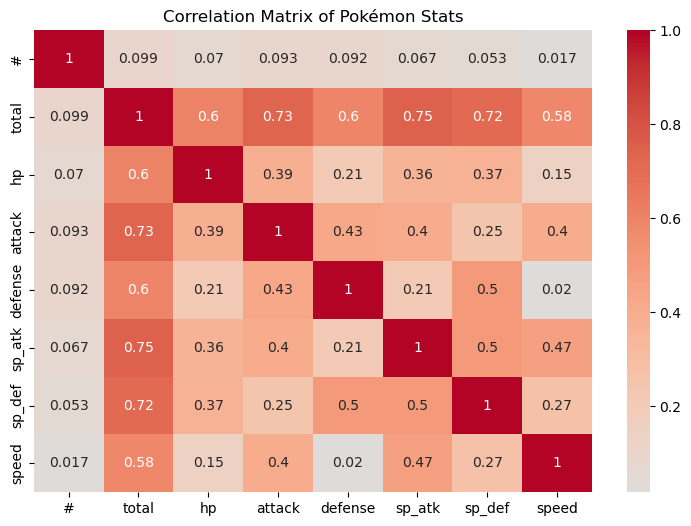

In [170]:
#Correlation matrix of numerical columns
training_data = pd.concat([X_train, y_train], axis = 1)
corr = training_data.corr(numeric_only = True)

plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Pokémon Stats');

> I've decided to omit categorical variables from the correlation matrix as encoding the cateogirical variables would not provide much context as each type would be assigned a number (1-7) that wouldn't be captured in a matrix. We see pretty weak correlations between battle stats above - except when they are associated with the total but that's simply due to the total being a function of all stats. Instead of using a correlation matrix I've plotted a heatup of average battle stats of each type category to help illustrate a relationship between the features and predictor variable. Here we see Psychic types tend to have the highest average total stats when compared to Grass, Water, Normal, Fire, Bug, and Other. It is important to note that this doesn't mean Psychic types have the highest average out of ALL Pokemon as the "Other" type can water down (in increase) the stats of the various types within it. We also see Psychic types have the highest average speed, sp_atk, and sp_def. Meanwhile, Normal types have the highest average hp.

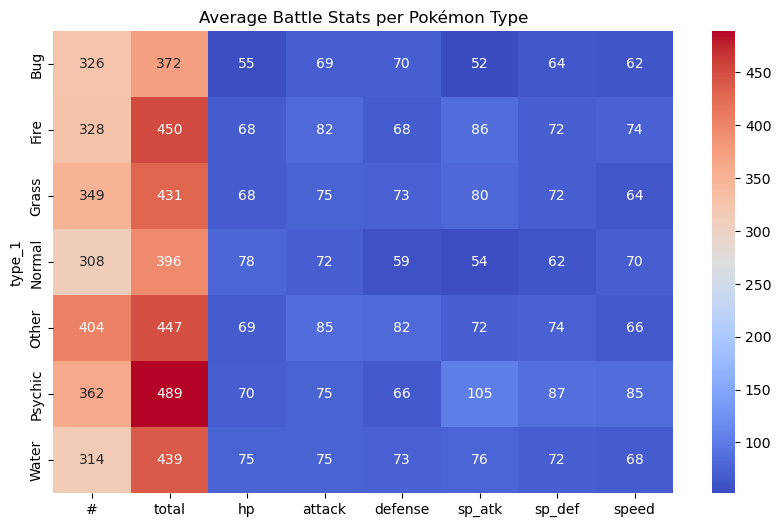

In [190]:
# Group by type and compute average stats
label_encoder = LabelEncoder()
training_data['type_1_encoded'] = label_encoder.fit_transform(y_train)
average_stats_per_type = training_data.groupby('type_1').mean(numeric_only = True)

# Plot a heatmap of the average stats for each type
plt.figure(figsize=(10,6))
sns.heatmap(average_stats_per_type.drop(columns=['type_1_encoded']), fmt='.0f', annot=True, cmap='coolwarm')
plt.title('Average Battle Stats per Pokémon Type'), plt.show();

## Exercise 5
Start preparing your data for fitting and predicting type_1 using legendary, generation, sp_atk, attack, speed, defense, hp, sp_def and:
- Dummy-coding legendary and generation variables
- Center and scale all predictors 

In [202]:
from sklearn.preprocessing import StandardScaler

In [207]:
predictors = ['legendary', 'generation', 'sp_atk', 'attack', 'speed', 'defense', 'hp', 'sp_def']
X_train_subset = X_train[predictors]
X_test_subset = X_test[predictors]

In [310]:
#Dummy-coding the 'legendary' and 'generation' categorical variables
X_train_encoded = pd.get_dummies(X_train_subset, columns=['legendary', 'generation'])
X_test_encoded = pd.get_dummies(X_test_subset, columns=['legendary', 'generation'])

#Apply the scaler to the predictors 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)

X_test_scaled = scaler.fit_transform(X_test_encoded)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_encoded.columns)
X_train_scaled.head(1)

,sp_atk,attack,speed,defense,hp,sp_def,legendary_False,legendary_True,generation_1,generation_2,generation_3,generation_4,generation_5,generation_6
0,0.817795,-1.027647,0.749414,-0.284468,-1.115886,1.694198,0.303562,-0.303562,1.943224,-0.388689,-0.512179,-0.420084,-0.490214,-0.347621


## Exercise 6
We'll be fitting and tuning an elastic net, tuning penalty and mixture. Set up this model, creating a parameter grid for "C" and "l1_ratio" with 10 levels each (where l1_ratio should range from 0 to 1). For this assignment let C range from 0.01 to 3.

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [315]:
elastic_net = LogisticRegression(solver='saga', penalty='elasticnet', random_state = 3)

param_grid = {
    'C': [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 1, 1.5, 2, 3],        
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1]       
}

grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring = 'roc_auc_ovr')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 0.2, 'l1_ratio': 0.7}


## Exercise 7
Now set up a random forest model. We'll be tuning max_features, min_samples_split, n_estimators. Explain what each of theses hyperparamters represent. Create a regular grid with 8 levels each. You can choose plausible ranges for each hyperparameter. Note that max_features should not be smaller than 1 or larger than 8. **Explain why neither of those values would make sense.**

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
random_forest = RandomForestClassifier(random_state = 3)

param_grid_rf = {
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8],           
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35],
    'n_estimators': [10, 50, 100, 200, 300, 350, 400, 500]  
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring = 'roc_auc_ovr')
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best parameters: {'max_features': 3, 'min_samples_split': 5, 'n_estimators': 200}


> The hyperparameters we tuned were the number of features to sample at each split (max_features), the number of observations needed to keep splitting nodes (min_samples_split), and number of trees (n_estimators).  The reason max_features can't be smaller than 1 or larger than 8 is because that would mean we are make predictions using 0 features or more than we actually have.

## Exercise 8
Fit all the models to your folded data. 

**Note: Tuning your random forest model will take a few minutes to run, anywhere from 5 to 15 minutes and up. Consider running your models outside the notebook and storing the results.**

Plot your results. What do you notice? Do larger or smaller values of C and l1_ratio produce better ROC AUC? What about values of min_samples_split, n_estimators, and max_features.

What elastic net model and what random forest model performed the best on your folded data? (What specific hyperparameters resulted in the optimal ROC AUC?)

In [323]:
# Extract results for Elastic Net and Random Forest
elastic_net_results = pd.DataFrame(grid_search.cv_results_)
random_forest_results = pd.DataFrame(grid_search_rf.cv_results_)

Best Elastic Net Hyperparameters based on ROC AUC: {'C': 0.2, 'l1_ratio': 0.7}
Best ROC AUC Score: 0.6958608519769436


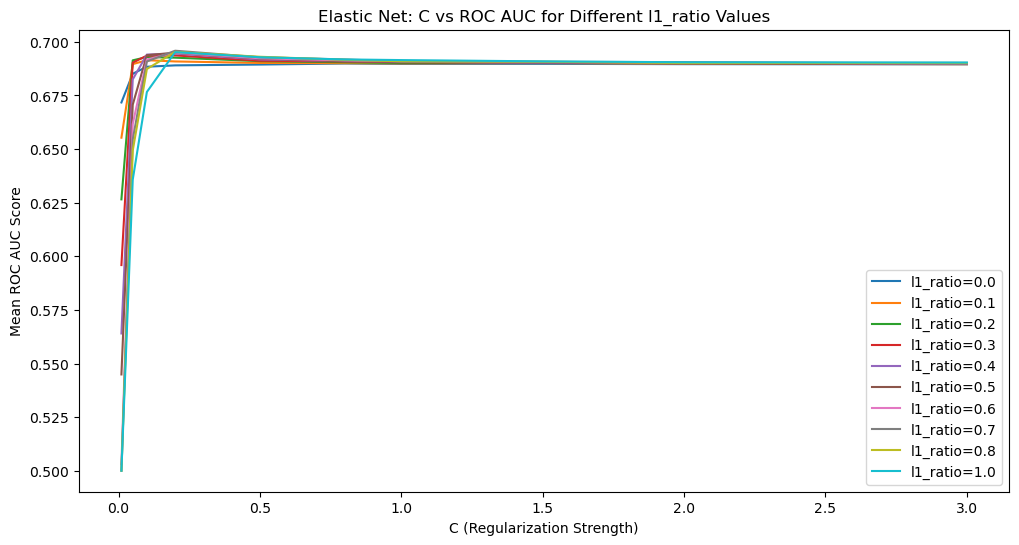

In [324]:
#Plotting for Elastic Net tuning metrics
plt.figure(figsize=(12, 6))
for l1_ratio in elastic_net_results['param_l1_ratio'].unique():
    subset = elastic_net_results[elastic_net_results['param_l1_ratio'] == l1_ratio]
    plt.plot(subset['param_C'], subset['mean_test_score'], label=f'l1_ratio={l1_ratio}')

plt.xlabel('C (Regularization Strength)'), plt.ylabel('Mean ROC AUC Score')
plt.title('Elastic Net: C vs ROC AUC for Different l1_ratio Values'), plt.legend()
print("Best Elastic Net Hyperparameters based on ROC AUC:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

> We see based on the graph above that varying l1_ratios have varying degrees of **initial** ROC_AUC_OVR scores with the lowest being a l1_ratio of 1.0. These scores all increased as C increased but leveled off soon before even reaching C = 0.5, where scores actually tended to fall off.

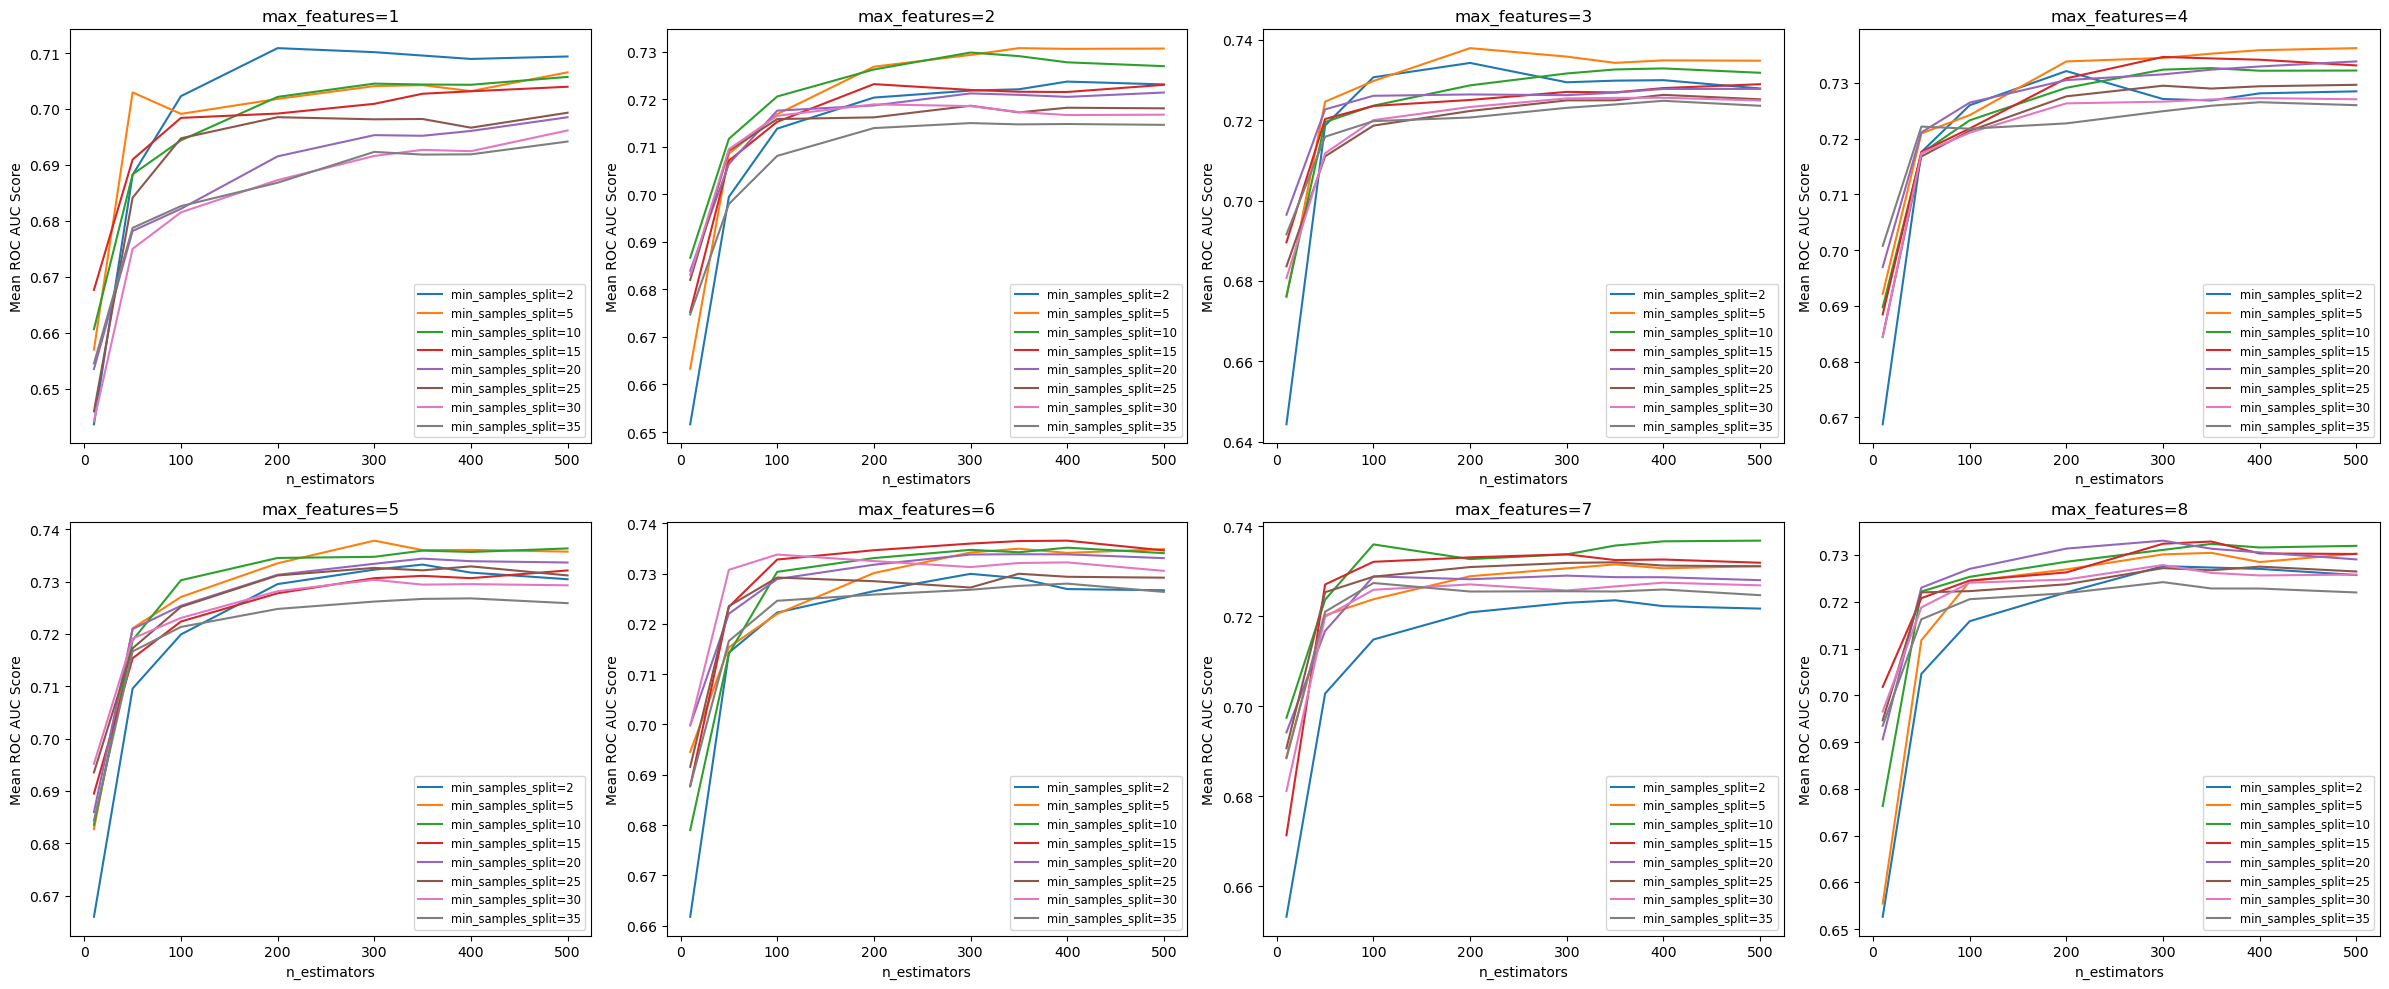

Best Random Forest Hyperparameters based on ROC AUC: {'max_features': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC Score: 0.7379280925415425


In [326]:
#Plotting for Random Forest tuning metrics 
max_features_values = random_forest_results['param_max_features'].unique()
min_samples_split_values = random_forest_results['param_min_samples_split'].unique()
fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 
axes = axes.flatten()  
for i, max_feat in enumerate(max_features_values):
    ax = axes[i]
    subset_max_feat = random_forest_results[random_forest_results['param_max_features'] == max_feat]
    for min_split in min_samples_split_values:
        subset_min_split = subset_max_feat[subset_max_feat['param_min_samples_split'] == min_split]
        ax.plot(subset_min_split['param_n_estimators'], subset_min_split['mean_test_score'], label=f'min_samples_split={min_split}')
    
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('Mean ROC AUC Score')
    ax.set_title(f'max_features={max_feat}')
    ax.legend(loc='best', fontsize='small')
plt.tight_layout(), plt.show()
print("Best Random Forest Hyperparameters based on ROC AUC:", grid_search_rf.best_params_)
print("Best ROC AUC Score:", grid_search_rf.best_score_)

> For our random forest models we see that an increase in number of estimators generally increased roc_auc_ovr scores, with the largest increase around the 0 - 200 range before tapering off. Max_features also affected the distribution of scores but its exact effect is quite hard to explain. It seems to almost have an inverse relationship with min_samples_split as increasing max features tended to push down the scores of the lower (2 & 5) sample splits. As for the sample splits themselves, we generally see sample splits around the 2-10 range performing the best when max_features is lower, with the inverse relationship occuring as max_features increases.  Min_samples_split = 10 tends to hover around the same mid to top range of roc_auc_ovr scores however. The best scores and their respective hyperparameters can be seen under each graph.


## Exercise 9
Select your optimal random forest model in terms of roc_auc. Then fit that model to your training set and evaluate its performance on the testing set.

Using the training set:
- Create a variable importance plot: what variables were most useful? Which were least useful? Are these results what you expected, or not?

Using the testing set:
- Create plots of the different ROC curves, one per level of the outcome variable;
- Make a heat map of the confusion matrix.


In [329]:
from collections import Counter

# Count the occurrences of each class in the test set
class_counts = Counter(y_test)
print(class_counts)


Counter({'Other': 68, 'Water': 22, 'Normal': 20, 'Bug': 14, 'Grass': 14, 'Psychic': 12, 'Fire': 10})


In [330]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [331]:
#Fitting best model (RF)
best_model = RandomForestClassifier(
    n_estimators = 200, max_features = 4, min_samples_split = 10, random_state = 3
)
best_model.fit(X_train_scaled, y_train)

#Predict  test set & calculate ROC AUC score for the test set
y_test_proba = best_model.predict_proba(X_test_scaled)
roc_auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
print("ROC AUC Score on Test Set:", roc_auc)

ROC AUC Score on Test Set: 0.6676788943673344


(Text(0.5, 1.0, 'Confusion Matrix Heatmap'),
 Text(70.72222222222221, 0.5, 'True Label'),
 Text(0.5, 36.72222222222221, 'Predicted Label'))

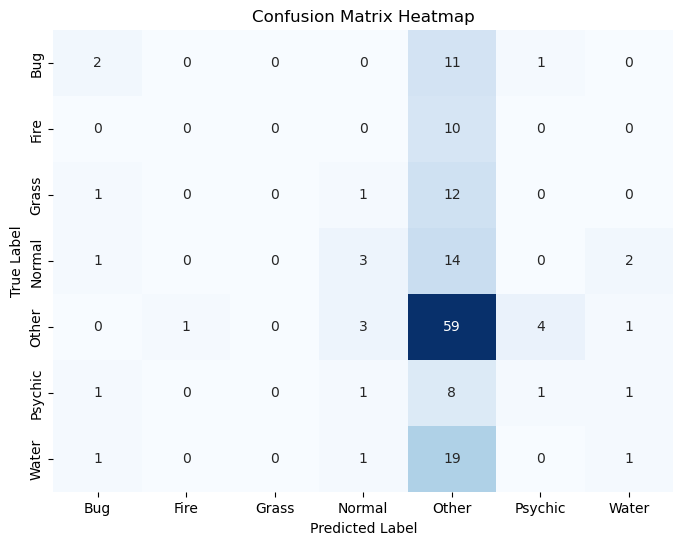

In [332]:
#Confusion matrix
y_test_pred = best_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix Heatmap'), plt.ylabel('True Label'), plt.xlabel('Predicted Label');

(([<matplotlib.axis.XTick at 0x1b1824051d0>,
  [Text(0, 0, 'sp_atk'),
   Text(1, 0, 'attack'),
   Text(2, 0, 'speed'),
   Text(3, 0, 'defense'),
   Text(4, 0, 'hp'),
   Text(5, 0, 'sp_def'),
   Text(6, 0, 'generation_6'),
   Text(7, 0, 'generation_1'),
   Text(8, 0, 'generation_2'),
   Text(9, 0, 'generation_5'),
   Text(10, 0, 'generation_3'),
   Text(11, 0, 'generation_4'),
   Text(12, 0, 'legendary_False'),
   Text(13, 0, 'legendary_True')]),
 None)

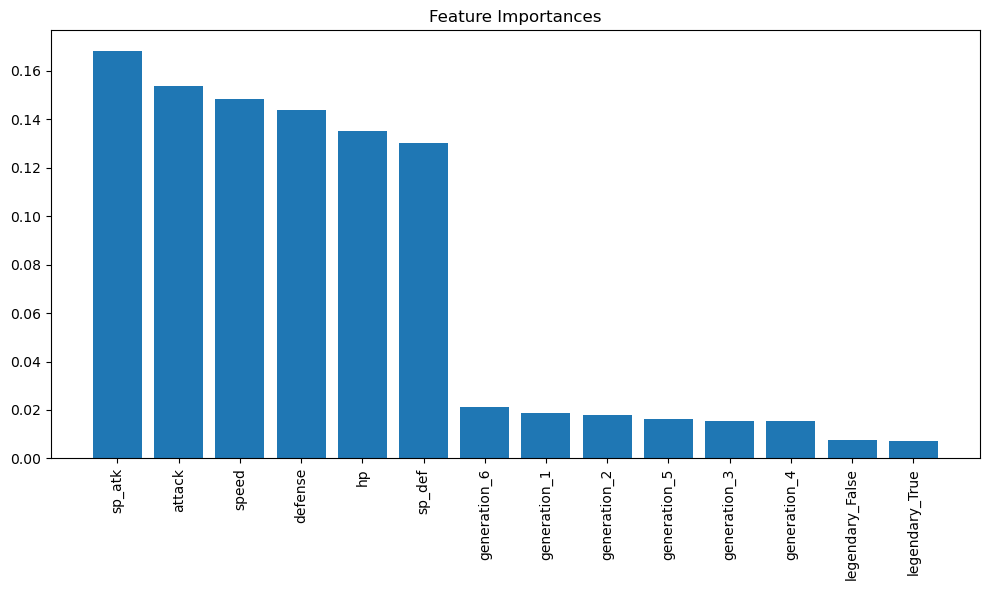

In [333]:
#Get feature importances from the model
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X_train_scaled.columns

plt.figure(figsize=(10, 6)), plt.title("Feature Importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), feature_names[indices], rotation=90), plt.tight_layout();

> We see the features with the most importance were the battle stats which hovered around the same level of importance before dropping off when it came to generation # and legendary status

In [335]:
from sklearn.preprocessing import label_binarize

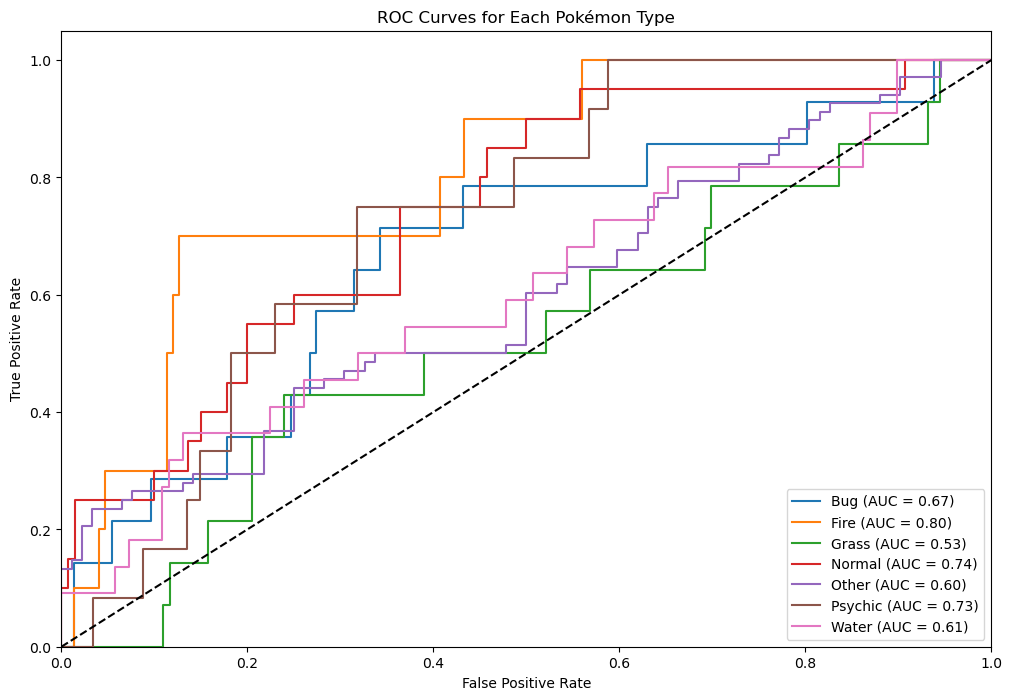

In [336]:
pokemon_types = y_train.cat.categories 

n_classes = len(pokemon_types)  
y_test_binarized = label_binarize(y_test, classes=pokemon_types)

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    if np.sum(y_test_binarized[:, i]) > 0:
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{pokemon_types[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--'), plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05]), plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Pokémon Type'), plt.legend(loc="lower right"), plt.show();

## Exercise 10
How did your best random forest model do on the testing set?

Which Pokemon types is the model best at predicting and which is it worst at? (Do you have any ideas why this might be?)

> Overall the model did pretty poorly with a roc_auc_ovr score of .6675. However the model did decently well when predicting fire types (.83) and normal types (.75) in particular, but extremely poorly on grass types (.53) and water types (.59). The inconsistent performance may be due to overlapping feature importance that make it harder for the model to distinguish between the many possible classes availible. The data constraints may also hurt the model as there aren't that many observations to train & test on - limiting model learning and room for error.